**Project -  Spam Detection**


SMS Spam Collection Data Set
Download: Data Folder, Data Set Description

Abstract: The SMS Spam Collection is a public set of SMS labeled messages that have been collected for mobile phone spam research.

Data Set Characteristics:  Multivariate, Text, Domain-Theory

Number of Instances: 5574

Area: Computer

Attribute Characteristics: Real

Number of Attributes: N/A

Date Donated 2012-06-22

Associated Tasks:  Classification, Clustering

Missing Values? N/A

Number of Web Hits: 306637


Source:

Tiago A. Almeida (talmeida ufscar.br)
Department of Computer Science
Federal University of Sao Carlos (UFSCar)
Sorocaba, Sao Paulo - Brazil

JosÃ© MarÃ­a GÃ³mez Hidalgo (jmgomezh yahoo.es)
R&D Department Optenet
Las Rozas, Madrid - Spain


Data Set Information:

This corpus has been collected from free or free for research sources at the Internet:

-> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [Web Link].
-> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link].
-> A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link].
-> Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link]. This corpus has been used in the following academic researches:

[1] GÃ³mez Hidalgo, J.M., Cajigas Bringas, G., Puertas Sanz, E., Carrero GarcÃ­a, F. Content Based SMS Spam Filtering. Proceedings of the 2006 ACM Symposium on Document Engineering (ACM DOCENG'06), Amsterdam, The Netherlands, 10-13, 2006.

[2] Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Feature engineering for mobile (SMS) spam filtering. Proceedings of the 30th Annual international ACM Conference on Research and Development in information Retrieval (ACM SIGIR'07), New York, NY, 871-872, 2007.

[3] Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Spam filtering for short messages. Proceedings of the 16th ACM Conference on Information and Knowledge Management (ACM CIKM'07). Lisbon, Portugal, 313-320, 2007.


Attribute Information:

The collection is composed by just one text file, where each line has the correct class followed by the raw message. We offer some examples bellow:

ham What you doing?how are you?
ham Ok lar... Joking wif u oni...
ham dun say so early hor... U c already then say...
ham MY NO. IN LUTON 0125698789 RING ME IF UR AROUND! H*
ham Siva is in hostel aha:-.
ham Cos i was out shopping wif darren jus now n i called him 2 ask wat present he wan lor. Then he started guessing who i was wif n he finally guessed darren lor.
spam FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop
spam Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. B
spam URGENT! Your Mobile No 07808726822 was awarded a L2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9758 BOX95QU

Note: the messages are not chronologically sorted.


Relevant Papers:

We offer a comprehensive study of this corpus in the following paper. This work presents a number of statistics, studies and baseline results for several machine learning methods.

Almeida, T.A., GÃ³mez Hidalgo, J.M., Yamakami, A. Contributions to the Study of SMS Spam Filtering: New Collection and Results. Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11), Mountain View, CA, USA, 2011.



**Step - 1** 

*   Getting things ready fro teh project
*   Import the reuried libraries
*   Load the data

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [157]:
df = pd.read_csv("SMSSpamCollection", sep='\t', names=['target', 'messages'])

In [158]:
df.head()

,target,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [159]:
df.tail()

,target,messages
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...
5573,ham,Rofl. Its true to its name


**Step - 2**  Perform the Exploratory Data Analysis on the data set


In [160]:
df.shape

(5574, 2)

In [161]:
df['target'].value_counts()

ham     4827
spam     747
Name: target, dtype: int64

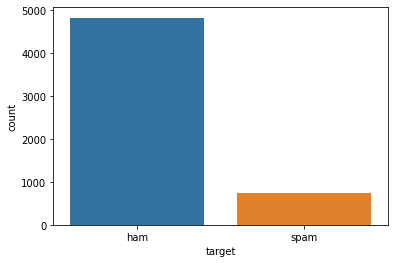

In [212]:
sns.countplot(x='target', data=df)


In [163]:
df.describe()

,target,messages
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4827,30


# Worldcloud for targets having spam

In [164]:
from wordcloud import WordCloud, STOPWORDS
# df = df.loc[df['target']=='spam',:]

In [165]:
df.head()

,target,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [166]:
wrds = ' '.join(df['messages'])
print(wrds)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's U dun say so early hor... U c already then say... Nah I don't think he goes to usf, he lives around here though FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv Even my brother is not like to speak with me. They treat me like aids patent. As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitl

In [167]:
output = " ".join([word for word in wrds.split()])

In [168]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=700,
                      height=400
                     ).generate(output)

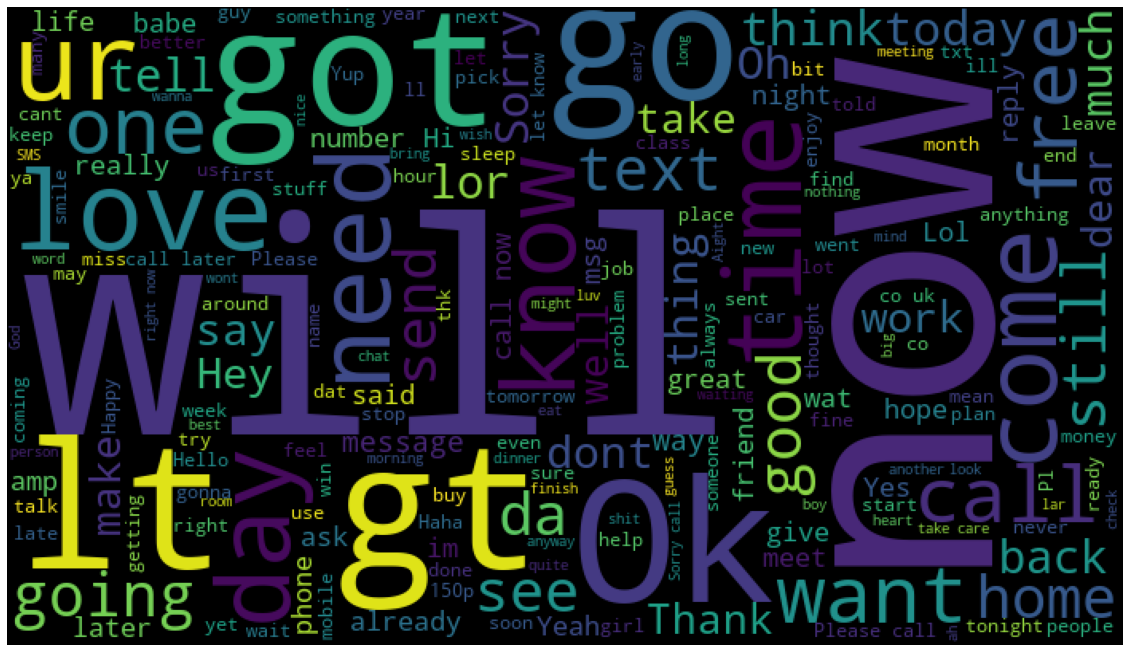

In [169]:
plt.figure(1,figsize=(20,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


## Step - 3 - Preprocess the data
* Remove special characters
* Conversion to lowercase
* Tokenization
* Stemming or Lemmatization


In [170]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [171]:
stemmer = PorterStemmer()

In [172]:
lemmatizer = WordNetLemmatizer()

In [173]:
# Creating the lists
clean_l1 = []
twt_l1 = []

In [174]:
def preprocess(raw_tweet, flg):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    letters_only = letters_only.lower()

    words = letters_only.split()
    
    words = [w for w in words if not w in stopwords.words("english")]
    
    if(flg == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_l1.append(" ".join(words))
    twt_l1.append(len(words))

In [175]:
df['target_spam']=df['target'].apply(lambda x: 0 if x=='spam' else 1)

In [176]:
clean_l1 = []
twt_l1 = []

df['messages'].apply(lambda x: preprocess(x, 'stem'))

df['clean_stem'] = clean_l1

df['tweet_stem'] = twt_l1

In [177]:
df.head()
df['target'].count()

5574

## Step - 4 - Data Preparation
* Train Test Split
* Identify the target variable
* Use Bag of Words to convert the Text data to Numerical Vectors


In [186]:
from sklearn.model_selection  import train_test_split
train, test = train_test_split(df,test_size=0.2,random_state=30)

In [187]:
train_tweet=[]
for tweet in train['clean_stem']:
    train_tweet.append(tweet)

test_tweet=[]
for tweet in test['clean_stem']:
    test_tweet.append(tweet)

In [188]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word")
train_features = vectorizer.fit_transform(train_tweet)
test_features = vectorizer.transform(test_tweet)

In [189]:
# print(vectorizer.get_feature_names())
vectorizer.vocabulary_

{'today': 4971,
 'sorri': 4496,
 'day': 1151,
 'ever': 1548,
 'angri': 187,
 'misbehav': 3028,
 'hurt': 2275,
 'plz': 3662,
 'slap': 4399,
 'urself': 5198,
 'bcoz': 437,
 'ur': 5186,
 'fault': 1647,
 'basic': 414,
 'good': 1966,
 'alway': 155,
 'celebr': 781,
 'ny': 3346,
 'famili': 1629,
 'fyi': 1857,
 'take': 4776,
 'quick': 3881,
 'shower': 4332,
 'epsilon': 1508,
 'like': 2725,
 'lt': 2823,
 'gt': 2038,
 'min': 3011,
 'fuck': 1835,
 'chicken': 840,
 'messag': 2990,
 'would': 5509,
 'late': 2660,
 'woould': 5491,
 'buzz': 696,
 'hear': 2133,
 'word': 5493,
 'sent': 4245,
 'jd': 2475,
 'custom': 1109,
 'servic': 4257,
 'cum': 1097,
 'account': 36,
 'execut': 1576,
 'mail': 2882,
 'id': 2302,
 'detail': 1226,
 'contact': 1002,
 'us': 5199,
 'natali': 3193,
 'invit': 2410,
 'friend': 1816,
 'repli': 4010,
 'ye': 5582,
 'see': 4221,
 'www': 5539,
 'sm': 4422,
 'ac': 25,
 'stop': 4629,
 'send': 4238,
 'frnd': 1822,
 'rington': 4064,
 'club': 908,
 'get': 1910,
 'uk': 5124,
 'singl': 4369

In [190]:
print("Total unique words:", len(vectorizer.vocabulary_))
print("Type of train_features:", type(train_features))
print("Shape of input data", train_features.shape)

Total unique words: 5644
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (4459, 5644)


## Step - 5 - Train the Model. Use the following algorithms:
* Logistic Regression
* Decision Trees
* SVM


In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## Logistic Regression

In [192]:
classifier = LogisticRegression()

In [193]:
main_features = train_features.toarray()
main_test = test_features.toarray()

fit = classifier.fit(main_features,train['target_spam'])
pred = fit.predict(main_test)
accuracy = accuracy_score(pred,test['target_spam'])
print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))

Accuracy of LogisticRegression is 0.9820627802690582


In [194]:
from sklearn import metrics
cmtmetric = metrics.confusion_matrix(pred,test['target_spam'])
cmtmetric

array([[124,   1],
       [ 19, 971]])

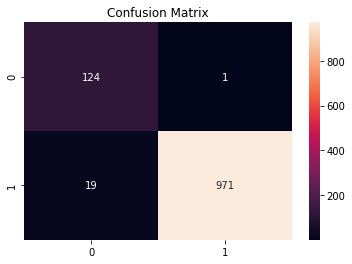

In [195]:
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [197]:
print(metrics.classification_report(pred,test['target_spam']))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       125
           1       1.00      0.98      0.99       990

    accuracy                           0.98      1115
   macro avg       0.93      0.99      0.96      1115
weighted avg       0.98      0.98      0.98      1115



## Decision tree

In [198]:
classifier_dt = DecisionTreeClassifier(max_depth = 2)

In [199]:
main_features = train_features.toarray()
main_test = test_features.toarray()

fit = classifier_dt.fit(main_features,train['target_spam'])
pred = fit.predict(main_test)
accuracy = accuracy_score(pred,test['target_spam'])
print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))

Accuracy of LogisticRegression is 0.8860986547085202


In [200]:
from sklearn import metrics
cmtmetric = metrics.confusion_matrix(pred,test['target_spam'])
cmtmetric

array([[ 80,  64],
       [ 63, 908]])

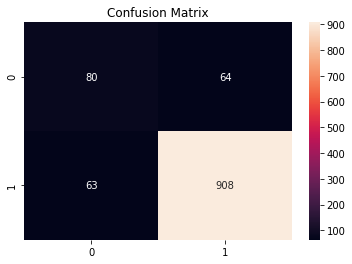

In [201]:
sns.heatmap(cmtmetric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [202]:
print(metrics.classification_report(pred,test['target_spam']))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56       144
           1       0.93      0.94      0.93       971

    accuracy                           0.89      1115
   macro avg       0.75      0.75      0.75      1115
weighted avg       0.89      0.89      0.89      1115



## Support Vector Machine

In [204]:
classifier_svm = SVC()

In [206]:
main_features = train_features.toarray()
main_test = test_features.toarray()

fit = classifier_svm.fit(main_features,train['target_spam'])
pred = fit.predict(main_test)
accuracy = accuracy_score(pred,test['target_spam'])
print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))

Accuracy of LogisticRegression is 0.9829596412556054


In [207]:
from sklearn import metrics
cmtmetric = metrics.confusion_matrix(pred,test['target_spam'])
cmtmetric

array([[125,   1],
       [ 18, 971]])

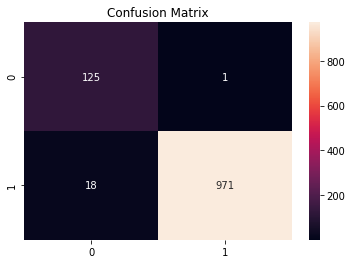

In [208]:
sns.heatmap(cmtmetric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [210]:
print(metrics.classification_report(pred,test['target_spam']))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       126
           1       1.00      0.98      0.99       989

    accuracy                           0.98      1115
   macro avg       0.94      0.99      0.96      1115
weighted avg       0.98      0.98      0.98      1115



## Conclusion
Context The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

Content The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

* Performed data analysis by Natural Language Text Processing on SMS spam data of 5574 phone messages
* Performed text preprocessing by tokenization, used feature extraction to determine ham or spam
* Used TF-IDF, used sklearn - feature extraction
* Developed and trained model to predict spam, ham classification.